In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('punches_class.csv')
df['ID'] = df['ID'].str.strip()
df['rounded_date'] = pd.to_datetime(df['rounded_date'])
df.head()

,ID,rounded_date
0,f2339fa1ccaa654b,2025-03-31
1,f2339fa1ccaa654b,2025-04-01
2,f2339fa1ccaa654b,2025-04-02
3,f2339fa1ccaa654b,2025-04-03
4,f2339fa1ccaa654b,2025-04-04


In [20]:
df = df.sort_values(by=['ID', 'rounded_date'])
df.head(10)

,ID,rounded_date
943918,0001b4354941b5db,2025-03-25
943919,0001b4354941b5db,2025-03-26
943920,0001b4354941b5db,2025-03-27
943921,0001b4354941b5db,2025-03-28
943922,0001b4354941b5db,2025-04-01
943923,0001b4354941b5db,2025-04-02
943924,0001b4354941b5db,2025-04-07
943925,0001b4354941b5db,2025-04-08
943926,0001b4354941b5db,2025-04-09
943927,0001b4354941b5db,2025-04-14


In [21]:
df['ID'].nunique()

23341

In [22]:
df.shape

(1653335, 2)

In [23]:
df['date_diff'] = df.groupby('ID')['rounded_date'].diff()
df.head(30)

,ID,rounded_date,date_diff
943918,0001b4354941b5db,2025-03-25,NaT
943919,0001b4354941b5db,2025-03-26,1 days
943920,0001b4354941b5db,2025-03-27,1 days
943921,0001b4354941b5db,2025-03-28,1 days
943922,0001b4354941b5db,2025-04-01,4 days
943923,0001b4354941b5db,2025-04-02,1 days
943924,0001b4354941b5db,2025-04-07,5 days
943925,0001b4354941b5db,2025-04-08,1 days
943926,0001b4354941b5db,2025-04-09,1 days
943927,0001b4354941b5db,2025-04-14,5 days


In [24]:
# Define gap threshold (30 days)
gap_threshold = 30

# Identify rows where a new employment period starts (gap > 30 days or first record)
df['is_new_period'] = (df['date_diff'].dt.days > gap_threshold) | (df['date_diff'].isna())
df

,ID,rounded_date,date_diff,is_new_period
943918,0001b4354941b5db,2025-03-25,NaT,True
943919,0001b4354941b5db,2025-03-26,1 days,False
943920,0001b4354941b5db,2025-03-27,1 days,False
943921,0001b4354941b5db,2025-03-28,1 days,False
943922,0001b4354941b5db,2025-04-01,4 days,False
...,...,...,...,...
1028604,fffba589de76af8c,2025-10-28,4 days,False
1028605,fffba589de76af8c,2025-10-29,1 days,False
1028606,fffba589de76af8c,2025-10-30,1 days,False
1028607,fffba589de76af8c,2025-10-31,1 days,False


In [25]:
# Create a period ID for each employment stint
df['period_id'] = df.groupby('ID')['is_new_period'].cumsum()
df

,ID,rounded_date,date_diff,is_new_period,period_id
943918,0001b4354941b5db,2025-03-25,NaT,True,1
943919,0001b4354941b5db,2025-03-26,1 days,False,1
943920,0001b4354941b5db,2025-03-27,1 days,False,1
943921,0001b4354941b5db,2025-03-28,1 days,False,1
943922,0001b4354941b5db,2025-04-01,4 days,False,1
...,...,...,...,...,...
1028604,fffba589de76af8c,2025-10-28,4 days,False,1
1028605,fffba589de76af8c,2025-10-29,1 days,False,1
1028606,fffba589de76af8c,2025-10-30,1 days,False,1
1028607,fffba589de76af8c,2025-10-31,1 days,False,1


In [26]:
employee = pd.read_csv('employee_class.csv')
employee['Hire_Date'] = pd.to_datetime(employee['Hire_Date'])
employee['TerminationDate'] = pd.to_datetime(employee['TerminationDate'])
employee.head()

,Hire_Date,TerminationDate,StateCode,Terminated,Job_Type,ID
0,2021-10-20,2024-06-26,TX,1,type_2,46b728354f2aaf9f
1,2022-03-16,2022-07-25,TX,1,type_1,9dfbd0d7e8e5d86e
2,2023-09-07,NaT,FL,0,type_2,b80ee989ff51c1f4
3,2025-02-27,2025-08-08,TX,1,type_1,de6d259e880d2e36
4,2021-12-30,2022-09-01,FL,1,type_1,0c6e2dbeedbccd87


In [27]:
employee['ID'].nunique()

85084

In [28]:
punch_start_date = df['rounded_date'].min()
print('punch_start_date = ', punch_start_date)
employee = employee[employee['Hire_Date']>= punch_start_date].reset_index(drop=True)
employee.head()

punch_start_date =  2024-10-01 00:00:00


,Hire_Date,TerminationDate,StateCode,Terminated,Job_Type,ID
0,2025-02-27,2025-08-08,TX,1,type_1,de6d259e880d2e36
1,2025-02-03,NaT,NC,0,type_1,aa179f8e32059d9d
2,2025-05-19,NaT,TX,0,type_1,7d68515e56d38837
3,2024-11-04,2024-11-18,TX,1,type_1,89b3c30aae20f726
4,2025-09-18,NaT,TX,0,type_1,dc12fe4f8422c309


In [29]:
# Get start and end dates for each employment period
employment_periods = df.groupby(['ID', 'period_id']).agg(
    start_date=('rounded_date', 'min'),
    end_date=('rounded_date', 'max')
).reset_index(drop=False)

employment_periods

,ID,period_id,start_date,end_date
0,0001b4354941b5db,1,2025-03-25,2025-06-23
1,0004059ba13133e3,1,2025-04-23,2025-11-03
2,00042ad43e0b6e31,1,2025-07-10,2025-07-31
3,00069168563b7677,1,2025-06-05,2025-08-21
4,00088823e81b57b5,1,2024-10-10,2025-01-23
...,...,...,...,...
25138,fff465d8b0b0d361,1,2025-02-24,2025-11-03
25139,fff4cb698aa9d213,1,2024-10-01,2025-11-03
25140,fff5b07a35d6bf4e,1,2024-12-12,2025-02-17
25141,fffa8d27dc4926f7,1,2025-01-08,2025-03-12


In [30]:
df['rounded_date'].max()

Timestamp('2025-11-04 00:00:00')

In [31]:
employment_periods['days_employed'] = (employment_periods['end_date'] - employment_periods['start_date']).dt.days
# Add termination date proxy (30 days after end_date)
# employment_periods['term_date_proxy'] = employment_periods['end_date'] + pd.Timedelta(days=30)

employment_periods['term_date_proxy'] = employment_periods['end_date']


employment_periods_with_term_date = pd.merge(employment_periods, employee, on='ID', how='inner')
employment_periods_with_term_date.head()

,ID,period_id,start_date,end_date,days_employed,term_date_proxy,Hire_Date,TerminationDate,StateCode,Terminated,Job_Type
0,0001b4354941b5db,1,2025-03-25,2025-06-23,90,2025-06-23,2025-03-24,2025-08-08,TX,1,type_2
1,0004059ba13133e3,1,2025-04-23,2025-11-03,194,2025-11-03,2025-04-22,NaT,TX,0,type_1
2,00042ad43e0b6e31,1,2025-07-10,2025-07-31,21,2025-07-31,2025-07-11,2025-08-01,SC,1,type_2
3,00069168563b7677,1,2025-06-05,2025-08-21,77,2025-08-21,2025-06-03,2025-10-02,TX,1,type_1
4,00088823e81b57b5,1,2024-10-10,2025-01-23,105,2025-01-23,2024-10-02,2025-02-17,CO,1,type_1


In [32]:
print(employment_periods_with_term_date['ID'].nunique())
print(employment_periods_with_term_date.shape)

16121
(17122, 11)


In [33]:
max_date = df['rounded_date'].max()
# Create IsTerminated column
employment_periods_with_term_date['IsTerminated'] = np.where(
    employment_periods_with_term_date['TerminationDate'].notna(),
    # If TerminationDate is not null, all periods for this ResourceId get 1
    1,
    # If TerminationDate is null, check if end_date is more than 30 days from max_date
    np.where(
        (max_date - employment_periods_with_term_date['end_date']).dt.days > 30,
        1,  # More than 30 days ago = terminated
        0   # Within 30 days = still active
    )
)

In [34]:
employment_periods_with_term_date.head()

,ID,period_id,start_date,end_date,days_employed,term_date_proxy,Hire_Date,TerminationDate,StateCode,Terminated,Job_Type,IsTerminated
0,0001b4354941b5db,1,2025-03-25,2025-06-23,90,2025-06-23,2025-03-24,2025-08-08,TX,1,type_2,1
1,0004059ba13133e3,1,2025-04-23,2025-11-03,194,2025-11-03,2025-04-22,NaT,TX,0,type_1,0
2,00042ad43e0b6e31,1,2025-07-10,2025-07-31,21,2025-07-31,2025-07-11,2025-08-01,SC,1,type_2,1
3,00069168563b7677,1,2025-06-05,2025-08-21,77,2025-08-21,2025-06-03,2025-10-02,TX,1,type_1,1
4,00088823e81b57b5,1,2024-10-10,2025-01-23,105,2025-01-23,2024-10-02,2025-02-17,CO,1,type_1,1


In [35]:
# Count the number of employment periods for each ResourceId

employment_periods = employment_periods_with_term_date.copy()

period_counts = employment_periods.groupby('ID').size().reset_index(name='period_count')

# Sort by highest to lowest
period_counts = period_counts.sort_values(by='period_count', ascending=False)
period_counts['period_count'].value_counts(normalize = False)

,count
period_count,
1,15230
2,793
3,89
4,6
5,3


In [36]:
employment_periods['days_employed'].value_counts()

,count
days_employed,
0,1329
1,570
2,370
7,362
4,328
...,...
345,1
331,1
390,1


In [37]:
# Replace 0 with 1 in days_employed
employment_periods['days_employed'] = employment_periods['days_employed'].replace(0, 1)


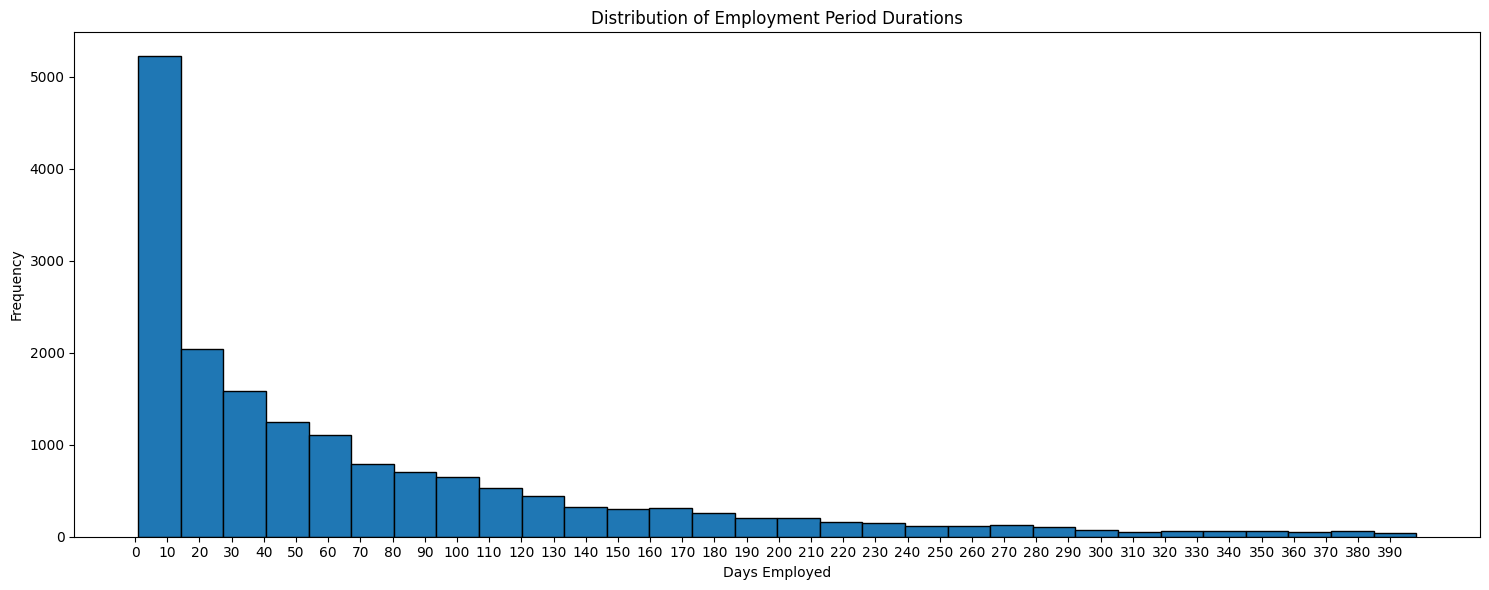

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.hist(employment_periods['days_employed'], bins=30, edgecolor='black')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Employment Period Durations')

# Add more ticks on x-axis only
plt.xticks(np.arange(0, employment_periods['days_employed'].max(), 10))

plt.tight_layout()
plt.show()

In [39]:
employment_periods['days_employed'].value_counts().sort_index()

,count
days_employed,
1,1899
2,370
3,301
4,328
5,227
...,...
394,1
395,4
396,4


In [40]:
print(employment_periods['ID'].nunique())
print(employment_periods.shape)

16121
(17122, 12)


In [41]:
employment_periods.head()

,ID,period_id,start_date,end_date,days_employed,term_date_proxy,Hire_Date,TerminationDate,StateCode,Terminated,Job_Type,IsTerminated
0,0001b4354941b5db,1,2025-03-25,2025-06-23,90,2025-06-23,2025-03-24,2025-08-08,TX,1,type_2,1
1,0004059ba13133e3,1,2025-04-23,2025-11-03,194,2025-11-03,2025-04-22,NaT,TX,0,type_1,0
2,00042ad43e0b6e31,1,2025-07-10,2025-07-31,21,2025-07-31,2025-07-11,2025-08-01,SC,1,type_2,1
3,00069168563b7677,1,2025-06-05,2025-08-21,77,2025-08-21,2025-06-03,2025-10-02,TX,1,type_1,1
4,00088823e81b57b5,1,2024-10-10,2025-01-23,105,2025-01-23,2024-10-02,2025-02-17,CO,1,type_1,1


Total records: 17122
Records with days_employed ≤ 180: 15375
Records excluded: 1747



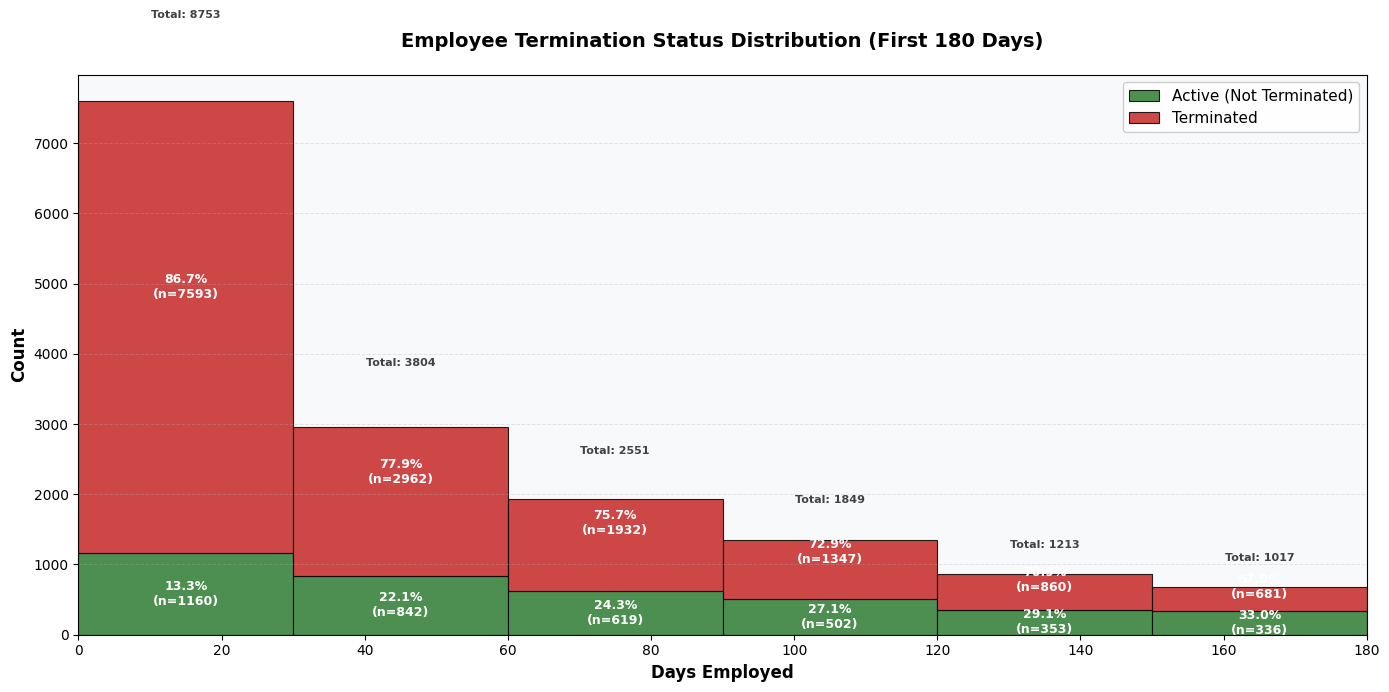


Detailed Summary (First 180 Days - 30-Day Bins):
Days   0- 30: Total=8753 | Active=1160 ( 13.3%) | Terminated=7593 ( 86.7%)
Days  30- 60: Total=3804 | Active= 842 ( 22.1%) | Terminated=2962 ( 77.9%)
Days  60- 90: Total=2551 | Active= 619 ( 24.3%) | Terminated=1932 ( 75.7%)
Days  90-120: Total=1849 | Active= 502 ( 27.1%) | Terminated=1347 ( 72.9%)
Days 120-150: Total=1213 | Active= 353 ( 29.1%) | Terminated= 860 ( 70.9%)
Days 150-180: Total=1017 | Active= 336 ( 33.0%) | Terminated= 681 ( 67.0%)

Overall Total (≤180 days): 19187
Total Active (Not Terminated): 3812 (19.9%)
Total Terminated: 15375 (80.1%)


In [42]:
import matplotlib.pyplot as plt
import numpy as np


final_df = employment_periods.copy()

final_df['Job_Type_Name'] = final_df['Job_Type']


# ============ PARAMETERS ============
MAX_DAYS_TO_PLOT = 180  # Only show employment periods up to this many days
# ====================================

# Filter data to only include periods up to MAX_DAYS_TO_PLOT
filtered_df = final_df[final_df['days_employed'] <= MAX_DAYS_TO_PLOT].copy()

print(f"Total records: {len(final_df)}")
print(f"Records with days_employed ≤ {MAX_DAYS_TO_PLOT}: {len(filtered_df)}")
print(f"Records excluded: {len(final_df) - len(filtered_df)}\n")

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Separate data by termination status
terminated = filtered_df[filtered_df['IsTerminated'] == 1]['days_employed']
not_terminated = filtered_df[filtered_df['IsTerminated'] == 0]['days_employed']

# Create bins (default 30-day bins)
bins = np.arange(0, MAX_DAYS_TO_PLOT + 30, 30)

# Professional colors: Green for active, Red for terminated
color_active = '#2E7D32'      # Professional dark green
color_terminated = '#C62828'   # Professional dark red

# Plot stacked histogram and get the counts
counts, bin_edges, patches = ax.hist([not_terminated, terminated], bins=bins, stacked=True,
        label=['Active (Not Terminated)', 'Terminated'],
        color=[color_active, color_terminated], alpha=0.85, edgecolor='black', linewidth=0.8)

# Calculate bin centers for text placement
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Get the counts for each category
not_terminated_counts = counts[0]
terminated_counts = counts[1]
total_counts = not_terminated_counts + terminated_counts

# Add percentage labels on each bar
for i, (bin_center, nt_count, t_count, total) in enumerate(zip(bin_centers, not_terminated_counts, terminated_counts, total_counts)):
    if total > 0:  # Only show if there's data in this bin
        # Calculate percentages
        nt_pct = (nt_count / total) * 100
        t_pct = (t_count / total) * 100

        # Position for not terminated label (middle of green section)
        if nt_count > 0:
            y_pos_nt = nt_count / 2
            ax.text(bin_center, y_pos_nt, f'{nt_pct:.1f}%\n(n={int(nt_count)})',
                   ha='center', va='center', fontsize=9, fontweight='bold', color='white')

        # Position for terminated label (middle of red section)
        if t_count > 0:
            y_pos_t = nt_count + (t_count / 2)
            ax.text(bin_center, y_pos_t, f'{t_pct:.1f}%\n(n={int(t_count)})',
                   ha='center', va='center', fontsize=9, fontweight='bold', color='white')

        # Add total count at the top of each bar
        ax.text(bin_center, total, f'Total: {int(total)}',
               ha='center', va='bottom', fontsize=8, fontweight='bold', color='#424242')

ax.set_xlabel('Days Employed', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title(f'Employee Termination Status Distribution (First {MAX_DAYS_TO_PLOT} Days)',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)

# Set x-axis limits to show only the range we're interested in
ax.set_xlim(0, MAX_DAYS_TO_PLOT)

# Add a subtle background
ax.set_facecolor('#F8F9FA')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nDetailed Summary (First {MAX_DAYS_TO_PLOT} Days - 30-Day Bins):")
print("=" * 90)
for i, (start, end) in enumerate(zip(bin_edges[:-1], bin_edges[1:])):
    nt_count = not_terminated_counts[i]
    t_count = terminated_counts[i]
    total = total_counts[i]
    if total > 0:
        nt_pct = (nt_count / total) * 100
        t_pct = (t_count / total) * 100
        print(f"Days {int(start):3d}-{int(end):3d}: Total={int(total):4d} | "
              f"Active={int(nt_count):4d} ({nt_pct:5.1f}%) | "
              f"Terminated={int(t_count):4d} ({t_pct:5.1f}%)")

print("\n" + "=" * 90)
print(f"Overall Total (≤{MAX_DAYS_TO_PLOT} days): {int(total_counts.sum())}")
print(f"Total Active (Not Terminated): {int(not_terminated_counts.sum())} "
      f"({(not_terminated_counts.sum()/total_counts.sum()*100):.1f}%)")
print(f"Total Terminated: {int(terminated_counts.sum())} "
      f"({(terminated_counts.sum()/total_counts.sum()*100):.1f}%)")

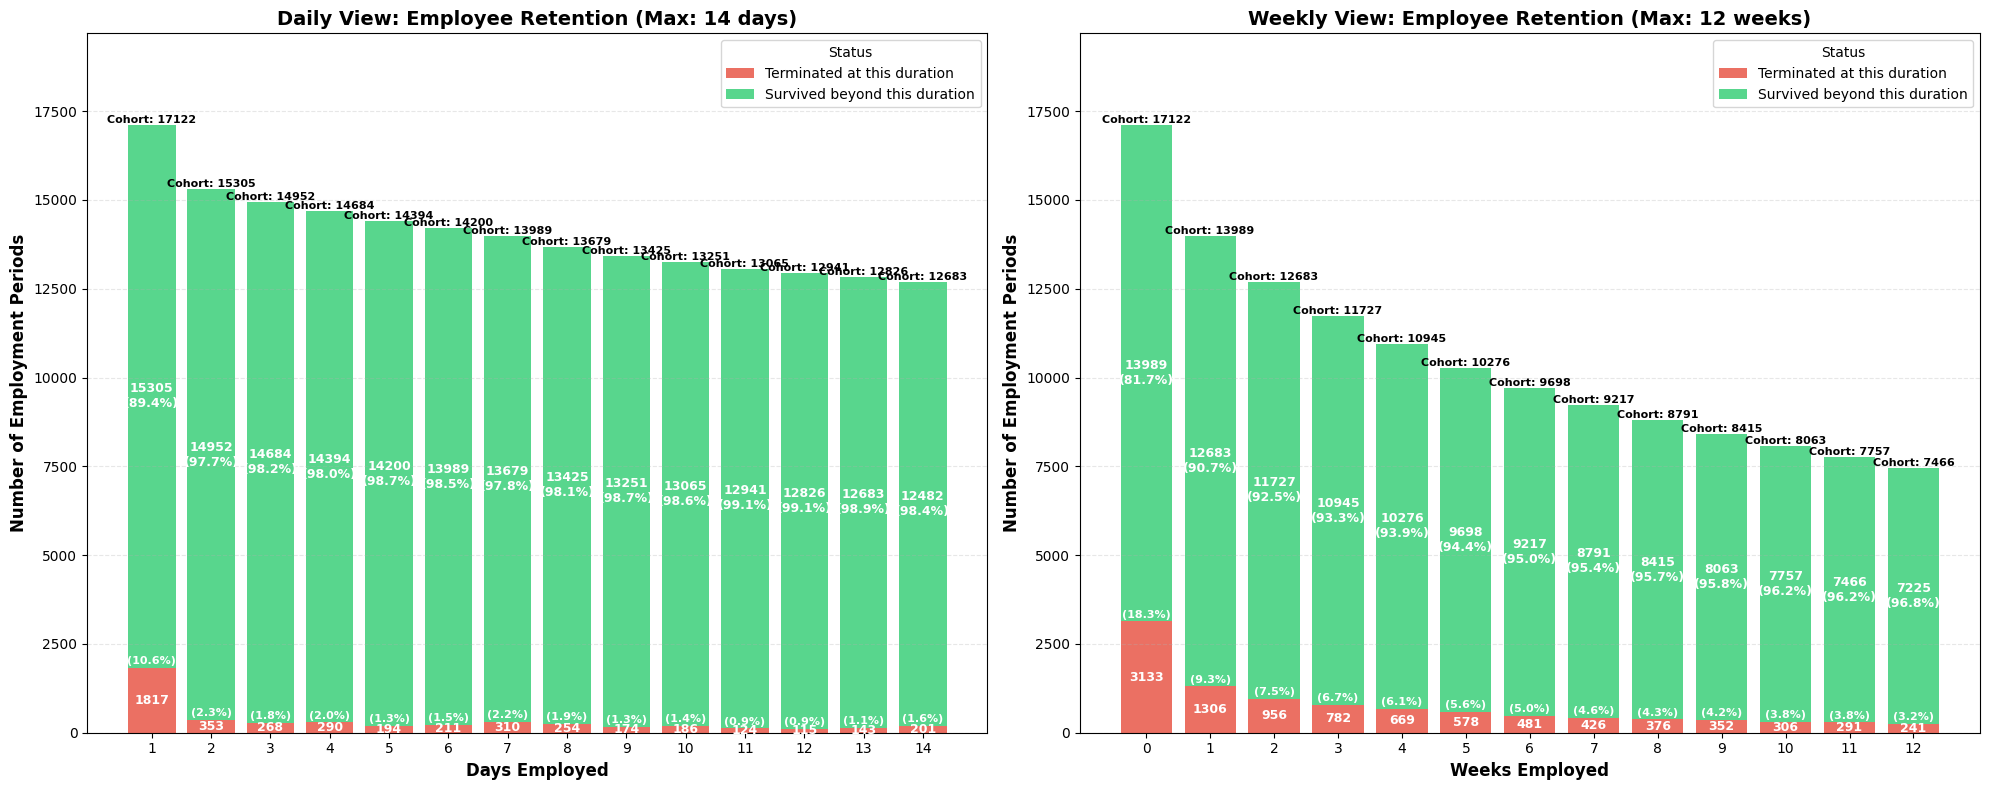


DAILY ANALYSIS (Max: 14 days)
    days  cohort  terminated  survived
0      1   17122        1817     15305
1      2   15305         353     14952
2      3   14952         268     14684
3      4   14684         290     14394
4      5   14394         194     14200
5      6   14200         211     13989
6      7   13989         310     13679
7      8   13679         254     13425
8      9   13425         174     13251
9     10   13251         186     13065
10    11   13065         124     12941
11    12   12941         115     12826
12    13   12826         143     12683
13    14   12683         201     12482

WEEKLY ANALYSIS (Max: 12 weeks)
    weeks  cohort  terminated  survived
0       0   17122        3133     13989
1       1   13989        1306     12683
2       2   12683         956     11727
3       3   11727         782     10945
4       4   10945         669     10276
5       5   10276         578      9698
6       6    9698         481      9217
7       7    9217         426  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters to adjust
max_days_employed = 14  # Adjust this value as needed
max_weeks_employed = 12  # Number of weeks to consider

# ============================================
# DAILY ANALYSIS
# ============================================
# Filter data and group by days_employed and IsTerminated
filtered_data = final_df[final_df['days_employed'] <= max_days_employed]
days_counts = filtered_data.groupby(['days_employed', 'IsTerminated']).size().unstack(fill_value=0)

# Calculate cohort sizes using cumulative logic
cohort_sizes = []
terminated_counts = []
survived_counts = []

# Start with total number of employment periods
total_periods = len(final_df)
current_cohort = total_periods

for days in days_counts.index:
    terminated = days_counts.loc[days, 1]
    survived = current_cohort - terminated

    cohort_sizes.append(current_cohort)
    terminated_counts.append(terminated)
    survived_counts.append(survived)

    current_cohort = survived

# Create DataFrame for daily plotting
plot_data_daily = pd.DataFrame({
    'days': days_counts.index,
    'cohort': cohort_sizes,
    'terminated': terminated_counts,
    'survived': survived_counts
})

# ============================================
# WEEKLY ANALYSIS
# ============================================
# Create weeks_employed column
final_df['weeks_employed'] = (final_df['days_employed'] / 7).astype(int)

# Filter data and group by weeks_employed and IsTerminated
filtered_data_weekly = final_df[final_df['weeks_employed'] <= max_weeks_employed]
weeks_counts = filtered_data_weekly.groupby(['weeks_employed', 'IsTerminated']).size().unstack(fill_value=0)

# Calculate cohort sizes for weekly
cohort_sizes_weekly = []
terminated_counts_weekly = []
survived_counts_weekly = []

current_cohort_weekly = total_periods

for weeks in weeks_counts.index:
    terminated = weeks_counts.loc[weeks, 1]
    survived = current_cohort_weekly - terminated

    cohort_sizes_weekly.append(current_cohort_weekly)
    terminated_counts_weekly.append(terminated)
    survived_counts_weekly.append(survived)

    current_cohort_weekly = survived

# Create DataFrame for weekly plotting
plot_data_weekly = pd.DataFrame({
    'weeks': weeks_counts.index,
    'cohort': cohort_sizes_weekly,
    'terminated': terminated_counts_weekly,
    'survived': survived_counts_weekly
})

# ============================================
# CREATE SIDE-BY-SIDE PLOTS
# ============================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# -------- DAILY PLOT --------
bars1_daily = ax1.bar(plot_data_daily['days'], plot_data_daily['terminated'],
                      label='Terminated at this duration', alpha=0.8, color='#e74c3c')
bars2_daily = ax1.bar(plot_data_daily['days'], plot_data_daily['survived'],
                      bottom=plot_data_daily['terminated'],
                      label='Survived beyond this duration', alpha=0.8, color='#2ecc71')

# Add counts and percentages on daily bars
for idx, row in plot_data_daily.iterrows():
    days = row['days']
    cohort = row['cohort']
    terminated = row['terminated']
    survived = row['survived']

    if cohort > 0:
        if terminated > 0:
            pct_term = (terminated / cohort) * 100
            height_term = terminated / 2
            ax1.text(days, height_term, f'{int(terminated)}',
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
            ax1.text(days, terminated + 50, f'({pct_term:.1f}%)',
                    ha='center', va='bottom', fontsize=8, fontweight='bold', color='white')

        if survived > 0:
            pct_surv = (survived / cohort) * 100
            height_surv = terminated + (survived / 2)
            ax1.text(days, height_surv, f'{int(survived)}\n({pct_surv:.1f}%)',
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')

        ax1.text(days, cohort, f'Cohort: {int(cohort)}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

ax1.set_xlabel('Days Employed', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Employment Periods', fontsize=12, fontweight='bold')
ax1.set_title(f'Daily View: Employee Retention (Max: {max_days_employed} days)',
             fontsize=14, fontweight='bold')
ax1.legend(title='Status', fontsize=10, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_xticks(plot_data_daily['days'])
y_max_daily = plot_data_daily['cohort'].max()
ax1.set_ylim(0, y_max_daily * 1.15)

# -------- WEEKLY PLOT --------
bars1_weekly = ax2.bar(plot_data_weekly['weeks'], plot_data_weekly['terminated'],
                       label='Terminated at this duration', alpha=0.8, color='#e74c3c')
bars2_weekly = ax2.bar(plot_data_weekly['weeks'], plot_data_weekly['survived'],
                       bottom=plot_data_weekly['terminated'],
                       label='Survived beyond this duration', alpha=0.8, color='#2ecc71')

# Add counts and percentages on weekly bars
for idx, row in plot_data_weekly.iterrows():
    weeks = row['weeks']
    cohort = row['cohort']
    terminated = row['terminated']
    survived = row['survived']

    if cohort > 0:
        if terminated > 0:
            pct_term = (terminated / cohort) * 100
            height_term = terminated / 2
            ax2.text(weeks, height_term, f'{int(terminated)}',
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
            ax2.text(weeks, terminated + 50, f'({pct_term:.1f}%)',
                    ha='center', va='bottom', fontsize=8, fontweight='bold', color='white')

        if survived > 0:
            pct_surv = (survived / cohort) * 100
            height_surv = terminated + (survived / 2)
            ax2.text(weeks, height_surv, f'{int(survived)}\n({pct_surv:.1f}%)',
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')

        ax2.text(weeks, cohort, f'Cohort: {int(cohort)}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

ax2.set_xlabel('Weeks Employed', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Employment Periods', fontsize=12, fontweight='bold')
ax2.set_title(f'Weekly View: Employee Retention (Max: {max_weeks_employed} weeks)',
             fontsize=14, fontweight='bold')
ax2.legend(title='Status', fontsize=10, loc='upper right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_xticks(plot_data_weekly['weeks'])
y_max_weekly = plot_data_weekly['cohort'].max()
ax2.set_ylim(0, y_max_weekly * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"DAILY ANALYSIS (Max: {max_days_employed} days)")
print(f"{'='*60}")
print(plot_data_daily)

print(f"\n{'='*60}")
print(f"WEEKLY ANALYSIS (Max: {max_weeks_employed} weeks)")
print(f"{'='*60}")
print(plot_data_weekly)


DAILY SURVIVAL PERCENTAGE CONDITIONAL ON REACHING THAT DAY
P(Survive past day D | Reached day D)
    days_employed  survival_pct_given_reached_day
0               1                           89.39
1               2                           97.69
2               3                           98.21
3               4                           98.03
4               5                           98.65
5               6                           98.51
6               7                           97.78
7               8                           98.14
8               9                           98.70
9              10                           98.60
10             11                           99.05
11             12                           99.11
12             13                           98.89
13             14                           98.42
14             15                           98.41
15             16                           99.00
16             17                           98.96
17

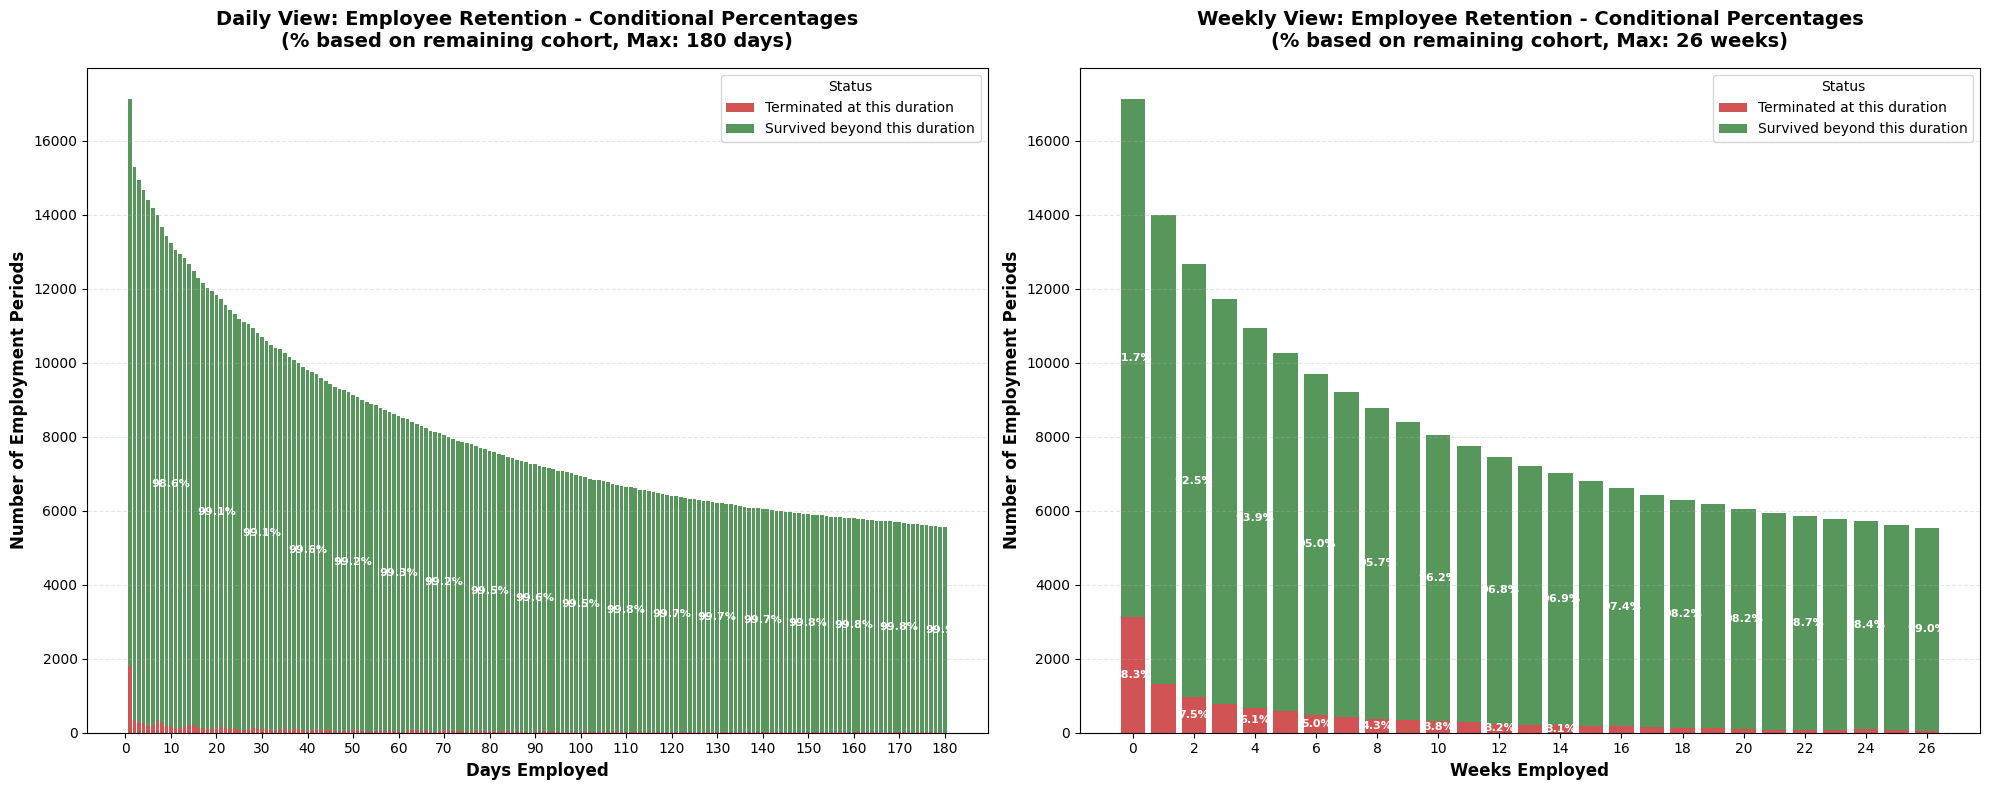


DAILY COHORT ANALYSIS - CONDITIONAL PERCENTAGES (Max: 180 days)
Percentages show: P(Status | Reached this day)
Days       Cohort       Terminated      Survived        % Term|Day         % Surv|Day        
-----------------------------------------------------------------------------------------------------------------------------
1          17122        1817            15305           10.6             % 89.4             %
2          15305        353             14952           2.3              % 97.7             %
3          14952        268             14684           1.8              % 98.2             %
4          14684        290             14394           2.0              % 98.0             %
5          14394        194             14200           1.3              % 98.7             %
6          14200        211             13989           1.5              % 98.5             %
7          13989        310             13679           2.2              % 97.8             %
8         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters to adjust
max_days_employed = 180  # Adjust this value as needed
max_weeks_employed = 26  # Number of weeks to consider (approximately 180 days / 7)

# ============================================
# DAILY ANALYSIS
# ============================================
# Filter data and group by days_employed and IsTerminated
filtered_data = final_df[final_df['days_employed'] <= max_days_employed]
days_counts = filtered_data.groupby(['days_employed', 'IsTerminated']).size().unstack(fill_value=0)

# Calculate cohort sizes using cumulative logic
cohort_sizes = []
terminated_counts = []
survived_counts = []

# Start with total number of employment periods
total_periods = len(final_df)
current_cohort = total_periods

for days in days_counts.index:
    terminated = days_counts.loc[days, 1]
    survived = current_cohort - terminated

    cohort_sizes.append(current_cohort)
    terminated_counts.append(terminated)
    survived_counts.append(survived)

    current_cohort = survived

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'days': days_counts.index,
    'cohort': cohort_sizes,
    'terminated': terminated_counts,
    'survived': survived_counts
})

# ============================================================================
# CREATE DAILY SURVIVAL DATAFRAME - CONDITIONAL ON REACHING THAT DAY
# ============================================================================

daily_survival_df = pd.DataFrame({
    'days_employed': plot_data['days'],
    'survival_pct_given_reached_day': (plot_data['survived'] / plot_data['cohort'] * 100).round(2)
})

# ============================================
# WEEKLY ANALYSIS
# ============================================
# Create weeks_employed column
final_df['weeks_employed'] = (final_df['days_employed'] / 7).astype(int)

# Filter data and group by weeks_employed and IsTerminated
filtered_data_weekly = final_df[final_df['weeks_employed'] <= max_weeks_employed]
weeks_counts = filtered_data_weekly.groupby(['weeks_employed', 'IsTerminated']).size().unstack(fill_value=0)

# Calculate cohort sizes for weekly
cohort_sizes_weekly = []
terminated_counts_weekly = []
survived_counts_weekly = []

current_cohort_weekly = total_periods

for weeks in weeks_counts.index:
    terminated = weeks_counts.loc[weeks, 1]
    survived = current_cohort_weekly - terminated

    cohort_sizes_weekly.append(current_cohort_weekly)
    terminated_counts_weekly.append(terminated)
    survived_counts_weekly.append(survived)

    current_cohort_weekly = survived

# Create DataFrame for weekly plotting
plot_data_weekly = pd.DataFrame({
    'weeks': weeks_counts.index,
    'cohort': cohort_sizes_weekly,
    'terminated': terminated_counts_weekly,
    'survived': survived_counts_weekly
})

# ============================================================================
# CREATE WEEKLY SURVIVAL DATAFRAME - CONDITIONAL ON REACHING THAT WEEK
# ============================================================================

weekly_survival_df = pd.DataFrame({
    'weeks_employed': plot_data_weekly['weeks'],
    'survival_pct_given_reached_week': (plot_data_weekly['survived'] / plot_data_weekly['cohort'] * 100).round(2)
})

# ============================================================================
# DISPLAY BOTH SURVIVAL DATAFRAMES
# ============================================================================

print("\n" + "="*70)
print("DAILY SURVIVAL PERCENTAGE CONDITIONAL ON REACHING THAT DAY")
print("P(Survive past day D | Reached day D)")
print("="*70)
print(daily_survival_df.head(20))
print(f"\n... (showing first 20 rows of {len(daily_survival_df)} total rows)")
print("="*70)

print("\n" + "="*70)
print("WEEKLY SURVIVAL PERCENTAGE CONDITIONAL ON REACHING THAT WEEK")
print("P(Survive past week W | Reached week W)")
print("="*70)
print(weekly_survival_df.head(20))
print(f"\n... (showing first 20 rows of {len(weekly_survival_df)} total rows)")
print("="*70)

# ============================================================================
# VISUALIZATION WITH CONDITIONAL PERCENTAGES - SIDE BY SIDE
# ============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# -------- DAILY PLOT --------
# Calculate percentages based on remaining cohort
pct_terminated_daily = (plot_data['terminated'] / plot_data['cohort'] * 100)
pct_survived_daily = (plot_data['survived'] / plot_data['cohort'] * 100)

# Create stacked bars (using actual counts for bar heights)
bars1_daily = ax1.bar(plot_data['days'], plot_data['terminated'],
                      label='Terminated at this duration', alpha=0.8, color='#C62828')
bars2_daily = ax1.bar(plot_data['days'], plot_data['survived'],
                      bottom=plot_data['terminated'],
                      label='Survived beyond this duration', alpha=0.8, color='#2E7D32')

# Add percentage labels on bars
for i, (day, cohort, terminated, survived) in enumerate(zip(plot_data['days'],
                                                             plot_data['cohort'],
                                                             plot_data['terminated'],
                                                             plot_data['survived'])):
    if cohort > 0:
        pct_term = (terminated / cohort) * 100
        pct_surv = (survived / cohort) * 100

        # Only show labels for every 10th day to avoid overcrowding
        if day % 10 == 0:
            if terminated > 0 and pct_term > 3:
                y_pos_term = terminated / 2
                ax1.text(day, y_pos_term, f'{pct_term:.1f}%',
                        ha='center', va='center', fontsize=8, fontweight='bold', color='white')

            if survived > 0 and pct_surv > 3:
                y_pos_surv = terminated + (survived / 2)
                ax1.text(day, y_pos_surv, f'{pct_surv:.1f}%',
                        ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# Customize daily plot
ax1.set_xlabel('Days Employed', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Employment Periods', fontsize=12, fontweight='bold')
ax1.set_title(f'Daily View: Employee Retention - Conditional Percentages\n(% based on remaining cohort, Max: {max_days_employed} days)',
              fontsize=14, fontweight='bold', pad=15)
ax1.legend(title='Status', fontsize=10, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_xticks(np.arange(0, max_days_employed + 1, 10))

# -------- WEEKLY PLOT --------
# Calculate percentages based on remaining cohort
pct_terminated_weekly = (plot_data_weekly['terminated'] / plot_data_weekly['cohort'] * 100)
pct_survived_weekly = (plot_data_weekly['survived'] / plot_data_weekly['cohort'] * 100)

# Create stacked bars (using actual counts for bar heights)
bars1_weekly = ax2.bar(plot_data_weekly['weeks'], plot_data_weekly['terminated'],
                       label='Terminated at this duration', alpha=0.8, color='#C62828')
bars2_weekly = ax2.bar(plot_data_weekly['weeks'], plot_data_weekly['survived'],
                       bottom=plot_data_weekly['terminated'],
                       label='Survived beyond this duration', alpha=0.8, color='#2E7D32')

# Add percentage labels on bars
for i, (week, cohort, terminated, survived) in enumerate(zip(plot_data_weekly['weeks'],
                                                              plot_data_weekly['cohort'],
                                                              plot_data_weekly['terminated'],
                                                              plot_data_weekly['survived'])):
    if cohort > 0:
        pct_term = (terminated / cohort) * 100
        pct_surv = (survived / cohort) * 100

        # Show labels for every 2nd week to avoid overcrowding
        if week % 2 == 0:
            if terminated > 0 and pct_term > 3:
                y_pos_term = terminated / 2
                ax2.text(week, y_pos_term, f'{pct_term:.1f}%',
                        ha='center', va='center', fontsize=8, fontweight='bold', color='white')

            if survived > 0 and pct_surv > 3:
                y_pos_surv = terminated + (survived / 2)
                ax2.text(week, y_pos_surv, f'{pct_surv:.1f}%',
                        ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# Customize weekly plot
ax2.set_xlabel('Weeks Employed', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Employment Periods', fontsize=12, fontweight='bold')
ax2.set_title(f'Weekly View: Employee Retention - Conditional Percentages\n(% based on remaining cohort, Max: {max_weeks_employed} weeks)',
              fontsize=14, fontweight='bold', pad=15)
ax2.legend(title='Status', fontsize=10, loc='upper right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_xticks(np.arange(0, max_weeks_employed + 1, 2))

plt.tight_layout()
plt.show()

# ============================================================================
# PRINT DETAILED STATISTICS TABLES
# ============================================================================

print("\n" + "="*125)
print(f"DAILY COHORT ANALYSIS - CONDITIONAL PERCENTAGES (Max: {max_days_employed} days)")
print("Percentages show: P(Status | Reached this day)")
print("="*125)
print(f"{'Days':<10} {'Cohort':<12} {'Terminated':<15} {'Survived':<15} {'% Term|Day':<18} {'% Surv|Day':<18}")
print("-"*125)

for idx, row in plot_data.head(30).iterrows():  # Show first 30 days
    days = row['days']
    cohort = row['cohort']
    terminated = row['terminated']
    survived = row['survived']
    pct_term = (terminated / cohort) * 100 if cohort > 0 else 0
    pct_surv = (survived / cohort) * 100 if cohort > 0 else 0

    print(f"{days:<10} {int(cohort):<12} {int(terminated):<15} {int(survived):<15} {pct_term:<17.1f}% {pct_surv:<17.1f}%")

print(f"\n... (showing first 30 days of {len(plot_data)} total days)")
print("="*125)

print("\n" + "="*125)
print(f"WEEKLY COHORT ANALYSIS - CONDITIONAL PERCENTAGES (Max: {max_weeks_employed} weeks)")
print("Percentages show: P(Status | Reached this week)")
print("="*125)
print(f"{'Weeks':<10} {'Cohort':<12} {'Terminated':<15} {'Survived':<15} {'% Term|Week':<18} {'% Surv|Week':<18}")
print("-"*125)

for idx, row in plot_data_weekly.iterrows():
    weeks = row['weeks']
    cohort = row['cohort']
    terminated = row['terminated']
    survived = row['survived']
    pct_term = (terminated / cohort) * 100 if cohort > 0 else 0
    pct_surv = (survived / cohort) * 100 if cohort > 0 else 0

    print(f"{weeks:<10} {int(cohort):<12} {int(terminated):<15} {int(survived):<15} {pct_term:<17.1f}% {pct_surv:<17.1f}%")

print("="*125)
print("\nNote: Percentages are conditional probabilities based on the cohort size at each time point")
print("Daily: % Term|Day = Probability of terminating at day D given you reached day D")
print("Weekly: % Term|Week = Probability of terminating at week W given you reached week W")

In [ ]:
weekly_survival_df.head()

,weeks_employed,survival_pct_given_reached_week
0,0,81.70
1,1,90.66
2,2,92.46
3,3,93.33
4,4,93.89


In [ ]:
daily_survival_df.head()

,days_employed,survival_pct_given_reached_day
0,1,89.39
1,2,97.69
2,3,98.21
3,4,98.03
4,5,98.65


In [ ]:
import pandas as pd

# ============================================
# CREATE weeks_employed COLUMN FIRST
# ============================================
# This needs to be done before any weekly analysis
if 'weeks_employed' not in final_df.columns:
    final_df['weeks_employed'] = (final_df['days_employed'] / 7).astype(int)

# ============================================
# DAILY SURVIVAL BY JOB TYPE
# ============================================

# Get top 3 job types by frequency
top_3_jobs = final_df['Job_Type_Name'].value_counts().head(3).index.tolist()

print("\n" + "="*70)
print("TOP 3 JOB TYPES BEING ANALYZED:")
print("="*70)
for i, job in enumerate(top_3_jobs, 1):
    count = len(final_df[final_df['Job_Type_Name'] == job])
    print(f"{i}. {job}: {count} employment periods")
print("="*70)

# Dictionary to store survival percentages for each job type
job_survival_data = {}

for job in top_3_jobs:
    # Filter data for this job type
    job_data = final_df[final_df['Job_Type_Name'] == job].copy()

    # Track cohort size for this job
    job_survival_pct = {}

    # Initialize cohort as all employment periods for this job that lasted at least 1 day
    current_job_cohort = len(job_data[job_data['days_employed'] >= 1])

    # Get max days for the entire dataset
    max_days = final_df['days_employed'].max()

    for day in range(1, max_days + 1):
        # Get terminated count at this exact day
        terminated_at_day = len(job_data[
            (job_data['days_employed'] == day) &
            (job_data['IsTerminated'] == 1)
        ])

        # Calculate survival
        survived = current_job_cohort - terminated_at_day

        # Calculate percentage
        if current_job_cohort > 0:
            survival_pct = (survived / current_job_cohort) * 100
        else:
            survival_pct = 0

        job_survival_pct[day] = round(survival_pct, 2)

        # Update cohort for next day
        current_job_cohort = survived

    job_survival_data[job] = job_survival_pct

# Add columns for each top 3 job type to existing daily_survival_df
for i, job in enumerate(top_3_jobs, 1):
    # Create clean column name
    job_clean = job.replace(' ', '_').replace('-', '_').replace('/', '_')[:50]
    col_name = f'survival_pct_{job_clean}'

    # Map survival percentages to dataframe
    daily_survival_df[col_name] = daily_survival_df['days_employed'].map(job_survival_data[job])

    # Fill NaN with 0 if any
    daily_survival_df[col_name] = daily_survival_df[col_name].fillna(0)

# ============================================
# WEEKLY SURVIVAL BY JOB TYPE
# ============================================

# Dictionary to store weekly survival percentages for each job type
job_survival_data_weekly = {}

for job in top_3_jobs:
    # Filter data for this job type
    job_data = final_df[final_df['Job_Type_Name'] == job].copy()

    # Track cohort size for this job
    job_survival_pct_weekly = {}

    # Initialize cohort as all employment periods for this job that lasted at least 0 weeks
    current_job_cohort = len(job_data[job_data['weeks_employed'] >= 0])

    # Get max weeks for the entire dataset
    max_weeks = final_df['weeks_employed'].max()

    for week in range(0, max_weeks + 1):
        # Get terminated count at this exact week
        terminated_at_week = len(job_data[
            (job_data['weeks_employed'] == week) &
            (job_data['IsTerminated'] == 1)
        ])

        # Calculate survival
        survived = current_job_cohort - terminated_at_week

        # Calculate percentage
        if current_job_cohort > 0:
            survival_pct = (survived / current_job_cohort) * 100
        else:
            survival_pct = 0

        job_survival_pct_weekly[week] = round(survival_pct, 2)

        # Update cohort for next week
        current_job_cohort = survived

    job_survival_data_weekly[job] = job_survival_pct_weekly

# Add columns for each top 3 job type to existing weekly_survival_df
for i, job in enumerate(top_3_jobs, 1):
    # Create clean column name
    job_clean = job.replace(' ', '_').replace('-', '_').replace('/', '_')[:50]
    col_name = f'survival_pct_{job_clean}'

    # Map survival percentages to dataframe
    weekly_survival_df[col_name] = weekly_survival_df['weeks_employed'].map(job_survival_data_weekly[job])

    # Fill NaN with 0 if any
    weekly_survival_df[col_name] = weekly_survival_df[col_name].fillna(0)

# ============================================
# DISPLAY UPDATED DATAFRAMES
# ============================================

print("\n" + "="*120)
print("DAILY SURVIVAL PERCENTAGE BY JOB TYPE")
print("P(Survive past day D | Reached day D)")
print("="*120)
print(daily_survival_df.head(30))
print(f"\n... (showing first 30 rows of {len(daily_survival_df)} total rows)")
print("="*120)

print("\n" + "="*120)
print("WEEKLY SURVIVAL PERCENTAGE BY JOB TYPE")
print("P(Survive past week W | Reached week W)")
print("="*120)
print(weekly_survival_df.head(20))
print(f"\n... (showing first 20 rows of {len(weekly_survival_df)} total rows)")
print("="*120)

# ============================================
# COMPARISON STATISTICS
# ============================================

print("\n" + "="*120)
print("SURVIVAL COMPARISON AT KEY MILESTONES")
print("="*120)

# Daily milestones
milestones_days = [1, 7, 14, 30, 60, 90, 180]
print("\nDAILY SURVIVAL RATES AT KEY DAYS:")
print(f"{'Days':<10} {'Overall':<15}", end="")
for job in top_3_jobs:
    job_short = job[:20] + "..." if len(job) > 20 else job
    print(f"{job_short:<25}", end="")
print()
print("-" * 120)

for day in milestones_days:
    if day in daily_survival_df['days_employed'].values:
        row = daily_survival_df[daily_survival_df['days_employed'] == day].iloc[0]
        print(f"{day:<10} {row['survival_pct_given_reached_day']:<14.2f}%", end="")
        for i, job in enumerate(top_3_jobs, 1):
            job_clean = job.replace(' ', '_').replace('-', '_').replace('/', '_')[:50]
            col_name = f'survival_pct_{job_clean}'
            print(f"{row[col_name]:<24.2f}%", end="")
        print()

# Weekly milestones
milestones_weeks = [1, 2, 4, 8, 12, 26]
print("\n" + "="*120)
print("WEEKLY SURVIVAL RATES AT KEY WEEKS:")
print(f"{'Weeks':<10} {'Overall':<15}", end="")
for job in top_3_jobs:
    job_short = job[:20] + "..." if len(job) > 20 else job
    print(f"{job_short:<25}", end="")
print()
print("-" * 120)

for week in milestones_weeks:
    if week in weekly_survival_df['weeks_employed'].values:
        row = weekly_survival_df[weekly_survival_df['weeks_employed'] == week].iloc[0]
        print(f"{week:<10} {row['survival_pct_given_reached_week']:<14.2f}%", end="")
        for i, job in enumerate(top_3_jobs, 1):
            job_clean = job.replace(' ', '_').replace('-', '_').replace('/', '_')[:50]
            col_name = f'survival_pct_{job_clean}'
            print(f"{row[col_name]:<24.2f}%", end="")
        print()

print("="*120)

# ============================================
# VERIFY CALCULATION METHOD
# ============================================

print("\n" + "="*120)
print("VERIFICATION: SURVIVAL CALCULATION METHOD")
print("="*120)
print("\nFor each job type, survival is calculated as:")
print("1. Start with cohort = all employment periods for that job type that reached day/week 1")
print("2. For each day/week:")
print("   - Count terminations at that exact day/week")
print("   - Survival % = (cohort - terminations) / cohort * 100")
print("   - Update cohort for next period by removing terminations")
print("\nThis gives conditional survival probability: P(Survive past D | Reached D)")
print("="*120)


TOP 3 JOB TYPES BEING ANALYZED:
1. type_2: 10306 employment periods
2. type_1: 6050 employment periods
3. type_3: 766 employment periods

DAILY SURVIVAL PERCENTAGE BY JOB TYPE
P(Survive past day D | Reached day D)
    days_employed  survival_pct_given_reached_day  survival_pct_type_2  \
0               1                           89.39                88.42   
1               2                           97.69                97.44   
2               3                           98.21                97.96   
3               4                           98.03                97.77   
4               5                           98.65                98.54   
5               6                           98.51                98.40   
6               7                           97.78                97.87   
7               8                           98.14                98.05   
8               9                           98.70                98.55   
9              10                           9

In [ ]:
weekly_survival_df.head()

,weeks_employed,survival_pct_given_reached_week,survival_pct_type_2,survival_pct_type_1,survival_pct_type_3
0,0,81.70,80.02,84.23,84.33
1,1,90.66,90.40,91.03,91.18
2,2,92.46,92.11,92.86,93.72
3,3,93.33,93.05,93.69,94.02
4,4,93.89,93.99,93.48,95.76



Daily Job Type Columns: ['survival_pct_type_2', 'survival_pct_type_1', 'survival_pct_type_3']
Number of Job Types: 3
Plotting days 1 to 30

Weekly Job Type Columns: ['survival_pct_type_2', 'survival_pct_type_1', 'survival_pct_type_3']
Number of Job Types: 3
Plotting weeks 0 to 12


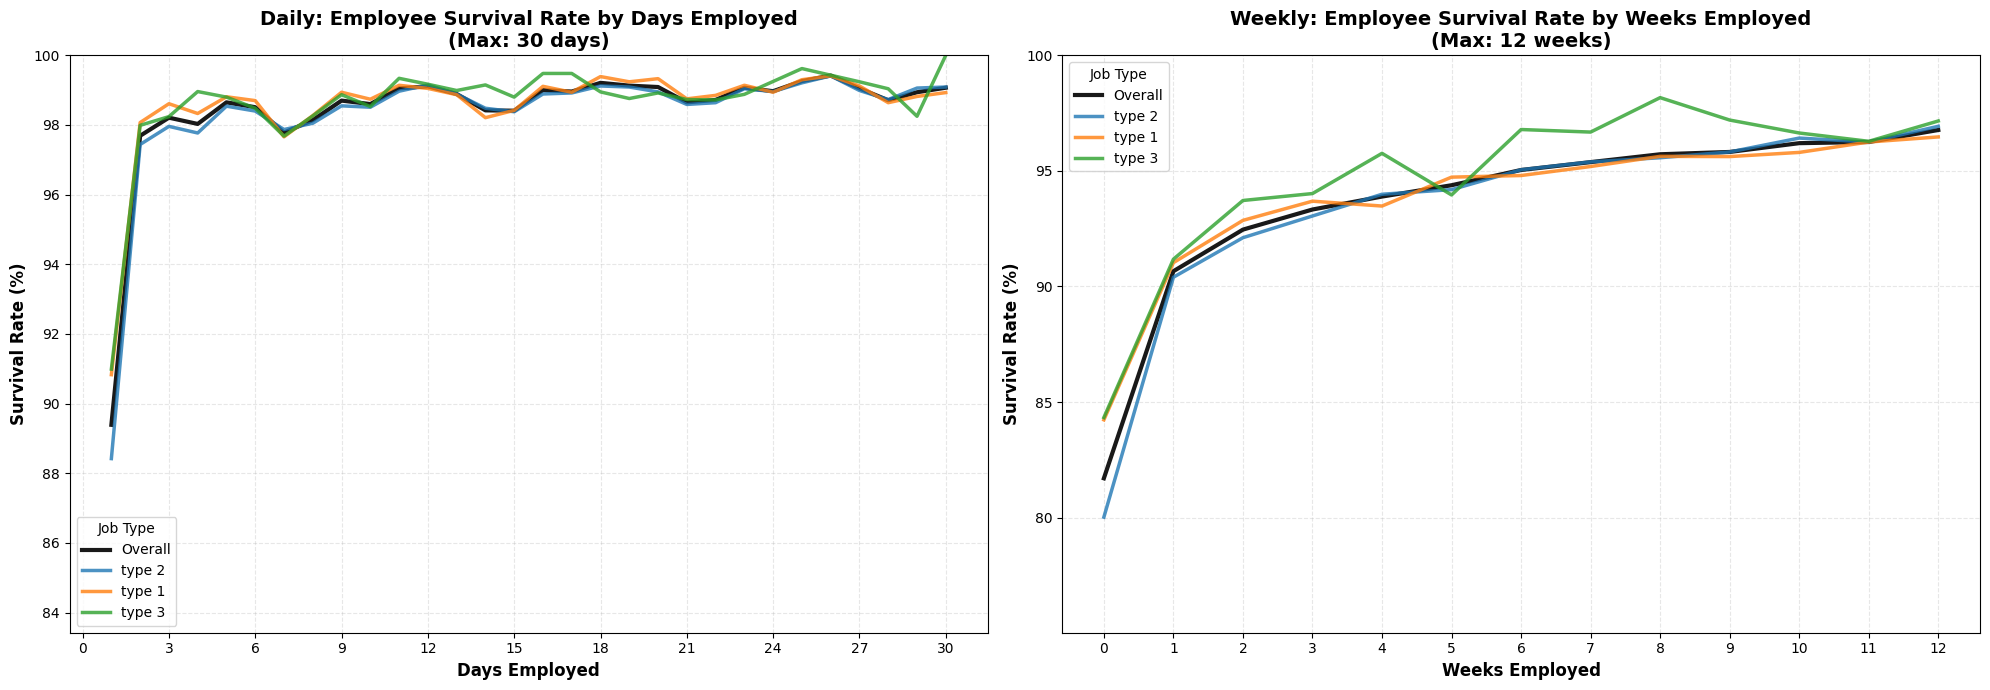

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ============================================
# PARAMETERS
# ============================================
max_days_to_plot = 30      # Adjust this value for daily plot
max_weeks_to_plot = 12     # Adjust this value for weekly plot

# ============================================
# DAILY PLOT
# ============================================

# Filter daily_survival_df based on days limit
plot_data_daily = daily_survival_df[daily_survival_df['days_employed'] <= max_days_to_plot].copy()

# Get the job type column names (exclude days_employed and overall survival)
job_columns_daily = [col for col in daily_survival_df.columns
                     if col.startswith('survival_pct_') and col != 'survival_pct_given_reached_day']

print(f"\nDaily Job Type Columns: {job_columns_daily}")
print(f"Number of Job Types: {len(job_columns_daily)}")
print(f"Plotting days 1 to {max_days_to_plot}")

# Find the min and max survival rates to set appropriate y-axis limits
if len(job_columns_daily) > 0:
    min_survival_daily = plot_data_daily[['survival_pct_given_reached_day'] + job_columns_daily].min().min()
    max_survival_daily = plot_data_daily[['survival_pct_given_reached_day'] + job_columns_daily].max().max()
else:
    min_survival_daily = plot_data_daily['survival_pct_given_reached_day'].min()
    max_survival_daily = plot_data_daily['survival_pct_given_reached_day'].max()

# Add some padding to y-axis
y_min_daily = max(0, min_survival_daily - 5)
y_max_daily = min(100, max_survival_daily + 5)

# ============================================
# WEEKLY PLOT
# ============================================

# Filter weekly_survival_df based on weeks limit
plot_data_weekly = weekly_survival_df[weekly_survival_df['weeks_employed'] <= max_weeks_to_plot].copy()

# Get the job type column names for weekly
job_columns_weekly = [col for col in weekly_survival_df.columns
                      if col.startswith('survival_pct_') and col != 'survival_pct_given_reached_week']

print(f"\nWeekly Job Type Columns: {job_columns_weekly}")
print(f"Number of Job Types: {len(job_columns_weekly)}")
print(f"Plotting weeks 0 to {max_weeks_to_plot}")

# Find the min and max survival rates for weekly
if len(job_columns_weekly) > 0:
    min_survival_weekly = plot_data_weekly[['survival_pct_given_reached_week'] + job_columns_weekly].min().min()
    max_survival_weekly = plot_data_weekly[['survival_pct_given_reached_week'] + job_columns_weekly].max().max()
else:
    min_survival_weekly = plot_data_weekly['survival_pct_given_reached_week'].min()
    max_survival_weekly = plot_data_weekly['survival_pct_given_reached_week'].max()

# Add some padding to y-axis
y_min_weekly = max(0, min_survival_weekly - 5)
y_max_weekly = min(100, max_survival_weekly + 5)

# ============================================
# CREATE SIDE-BY-SIDE PLOTS
# ============================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# -------- LEFT PLOT: DAILY --------

# Plot overall survival rate first (thicker line)
ax1.plot(plot_data_daily['days_employed'],
         plot_data_daily['survival_pct_given_reached_day'],
         label='Overall',
         color='black',
         linewidth=3,
         alpha=0.9)

# Plot line for each job type
for idx, col in enumerate(job_columns_daily):
    # Extract job name from column name for legend
    job_name = col.replace('survival_pct_', '').replace('_', ' ')

    ax1.plot(plot_data_daily['days_employed'],
             plot_data_daily[col],
             label=job_name,
             color=colors[idx % len(colors)],
             linewidth=2.5,
             alpha=0.8)

# Customize daily plot
ax1.set_xlabel('Days Employed', fontsize=12, fontweight='bold')
ax1.set_ylabel('Survival Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title(f'Daily: Employee Survival Rate by Days Employed\n(Max: {max_days_to_plot} days)',
              fontsize=14, fontweight='bold')
ax1.legend(title='Job Type', fontsize=10, loc='best')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim(y_min_daily, y_max_daily)
ax1.set_xticks(np.arange(0, max_days_to_plot + 1, max(1, max_days_to_plot // 10)))

# -------- RIGHT PLOT: WEEKLY --------

# Plot overall survival rate first (thicker line)
ax2.plot(plot_data_weekly['weeks_employed'],
         plot_data_weekly['survival_pct_given_reached_week'],
         label='Overall',
         color='black',
         linewidth=3,
         alpha=0.9)

# Plot line for each job type
for idx, col in enumerate(job_columns_weekly):
    # Extract job name from column name for legend
    job_name = col.replace('survival_pct_', '').replace('_', ' ')

    ax2.plot(plot_data_weekly['weeks_employed'],
             plot_data_weekly[col],
             label=job_name,
             color=colors[idx % len(colors)],
             linewidth=2.5,
             alpha=0.8)

# Customize weekly plot
ax2.set_xlabel('Weeks Employed', fontsize=12, fontweight='bold')
ax2.set_ylabel('Survival Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title(f'Weekly: Employee Survival Rate by Weeks Employed\n(Max: {max_weeks_to_plot} weeks)',
              fontsize=14, fontweight='bold')
ax2.legend(title='Job Type', fontsize=10, loc='best')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim(y_min_weekly, y_max_weekly)
ax2.set_xticks(np.arange(0, max_weeks_to_plot + 1, max(1, max_weeks_to_plot // 10)))

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# ============================================
# PARAMETER
# ============================================
num_top_states = 5  # Adjust this value as needed

# ============================================
# PREPARE STATE GROUPING
# ============================================

# Get top N states by total employment period count
top_states = final_df['StateCode'].value_counts().nlargest(num_top_states).index.tolist()

print(f"\n{'='*70}")
print(f"TOP {num_top_states} STATES BEING ANALYZED:")
print(f"{'='*70}")
for i, state in enumerate(top_states, 1):
    count = len(final_df[final_df['StateCode'] == state])
    print(f"{i}. {state}: {count} employment periods")
print(f"{'='*70}")

# Create a new column with state or "Others"
final_df_grouped = final_df.copy()
final_df_grouped['StateGroup'] = final_df_grouped['StateCode'].apply(
    lambda x: x if x in top_states else 'Others'
)

# Get all state groups (top N + Others)
all_state_groups = top_states + ['Others']

# ============================================
# DAILY SURVIVAL BY STATE
# ============================================

# Dictionary to store survival percentages for each state group
state_survival_data_daily = {}

for state in all_state_groups:
    # Filter data for this state group
    state_data = final_df_grouped[final_df_grouped['StateGroup'] == state].copy()

    # Track cohort size for this state
    state_survival_pct = {}

    # Initialize cohort as all employment periods for this state that lasted at least 1 day
    current_state_cohort = len(state_data[state_data['days_employed'] >= 1])

    # Get max days for the entire dataset
    max_days = final_df['days_employed'].max()

    for day in range(1, max_days + 1):
        # Get terminated count at this exact day
        terminated_at_day = len(state_data[
            (state_data['days_employed'] == day) &
            (state_data['IsTerminated'] == 1)
        ])

        # Calculate survival
        survived = current_state_cohort - terminated_at_day

        # Calculate percentage
        if current_state_cohort > 0:
            survival_pct = (survived / current_state_cohort) * 100
        else:
            survival_pct = 0

        state_survival_pct[day] = round(survival_pct, 2)

        # Update cohort for next day
        current_state_cohort = survived

    state_survival_data_daily[state] = state_survival_pct

# Add columns for each state group to daily_survival_df
for state in all_state_groups:
    # Create clean column name
    col_name = f'survival_pct_state_{state}'

    # Map survival percentages to dataframe
    daily_survival_df[col_name] = daily_survival_df['days_employed'].map(state_survival_data_daily[state])

    # Fill NaN with 0 if any
    daily_survival_df[col_name] = daily_survival_df[col_name].fillna(0)

print(f"\n✓ Added {len(all_state_groups)} state columns to daily_survival_df")
print(f"New columns: {[f'survival_pct_state_{state}' for state in all_state_groups]}")

# ============================================
# WEEKLY SURVIVAL BY STATE
# ============================================

# Dictionary to store weekly survival percentages for each state group
state_survival_data_weekly = {}

for state in all_state_groups:
    # Filter data for this state group
    state_data = final_df_grouped[final_df_grouped['StateGroup'] == state].copy()

    # Track cohort size for this state
    state_survival_pct_weekly = {}

    # Initialize cohort as all employment periods for this state that lasted at least 0 weeks
    current_state_cohort = len(state_data[state_data['weeks_employed'] >= 0])

    # Get max weeks for the entire dataset
    max_weeks = final_df['weeks_employed'].max()

    for week in range(0, max_weeks + 1):
        # Get terminated count at this exact week
        terminated_at_week = len(state_data[
            (state_data['weeks_employed'] == week) &
            (state_data['IsTerminated'] == 1)
        ])

        # Calculate survival
        survived = current_state_cohort - terminated_at_week

        # Calculate percentage
        if current_state_cohort > 0:
            survival_pct = (survived / current_state_cohort) * 100
        else:
            survival_pct = 0

        state_survival_pct_weekly[week] = round(survival_pct, 2)

        # Update cohort for next week
        current_state_cohort = survived

    state_survival_data_weekly[state] = state_survival_pct_weekly

# Add columns for each state group to weekly_survival_df
for state in all_state_groups:
    # Create clean column name
    col_name = f'survival_pct_state_{state}'

    # Map survival percentages to dataframe
    weekly_survival_df[col_name] = weekly_survival_df['weeks_employed'].map(state_survival_data_weekly[state])

    # Fill NaN with 0 if any
    weekly_survival_df[col_name] = weekly_survival_df[col_name].fillna(0)

print(f"\n✓ Added {len(all_state_groups)} state columns to weekly_survival_df")
print(f"New columns: {[f'survival_pct_state_{state}' for state in all_state_groups]}")

# ============================================
# DISPLAY UPDATED DATAFRAMES
# ============================================

print("\n" + "="*120)
print("DAILY SURVIVAL PERCENTAGE BY STATE")
print("P(Survive past day D | Reached day D)")
print("="*120)
print(daily_survival_df.head(30))
print(f"\n... (showing first 30 rows of {len(daily_survival_df)} total rows)")
print("="*120)

print("\n" + "="*120)
print("WEEKLY SURVIVAL PERCENTAGE BY STATE")
print("P(Survive past week W | Reached week W)")
print("="*120)
print(weekly_survival_df.head(20))
print(f"\n... (showing first 20 rows of {len(weekly_survival_df)} total rows)")
print("="*120)

# ============================================
# COMPARISON STATISTICS BY STATE
# ============================================

print("\n" + "="*150)
print("SURVIVAL COMPARISON AT KEY MILESTONES BY STATE")
print("="*150)

# Daily milestones
milestones_days = [1, 7, 14, 30, 60, 90, 180]
print("\nDAILY SURVIVAL RATES AT KEY DAYS:")
print(f"{'Days':<10} {'Overall':<15}", end="")
for state in all_state_groups:
    print(f"{state:<15}", end="")
print()
print("-" * 150)

for day in milestones_days:
    if day in daily_survival_df['days_employed'].values:
        row = daily_survival_df[daily_survival_df['days_employed'] == day].iloc[0]
        print(f"{day:<10} {row['survival_pct_given_reached_day']:<14.2f}%", end="")
        for state in all_state_groups:
            col_name = f'survival_pct_state_{state}'
            print(f"{row[col_name]:<14.2f}%", end="")
        print()

# Weekly milestones
milestones_weeks = [1, 2, 4, 8, 12, 26]
print("\n" + "="*150)
print("WEEKLY SURVIVAL RATES AT KEY WEEKS:")
print(f"{'Weeks':<10} {'Overall':<15}", end="")
for state in all_state_groups:
    print(f"{state:<15}", end="")
print()
print("-" * 150)

for week in milestones_weeks:
    if week in weekly_survival_df['weeks_employed'].values:
        row = weekly_survival_df[weekly_survival_df['weeks_employed'] == week].iloc[0]
        print(f"{week:<10} {row['survival_pct_given_reached_week']:<14.2f}%", end="")
        for state in all_state_groups:
            col_name = f'survival_pct_state_{state}'
            print(f"{row[col_name]:<14.2f}%", end="")
        print()

print("="*150)

# ============================================
# STATE GROUP SUMMARY
# ============================================

print("\n" + "="*100)
print(f"STATE GROUP SUMMARY (Top {num_top_states} + Others)")
print("="*100)
print(f"{'State':<15} {'Employment Periods':<25} {'% of Total':<15}")
print("-" * 100)

total_periods = len(final_df)
for state in all_state_groups:
    count = len(final_df_grouped[final_df_grouped['StateGroup'] == state])
    pct = (count / total_periods) * 100
    print(f"{state:<15} {count:<25} {pct:<14.2f}%")

print("="*100)


TOP 5 STATES BEING ANALYZED:
1. TX: 4868 employment periods
2. FL: 2432 employment periods
3. GA: 1409 employment periods
4. AZ: 931 employment periods
5. NC: 926 employment periods

✓ Added 6 state columns to daily_survival_df
New columns: ['survival_pct_state_TX', 'survival_pct_state_FL', 'survival_pct_state_GA', 'survival_pct_state_AZ', 'survival_pct_state_NC', 'survival_pct_state_Others']

✓ Added 6 state columns to weekly_survival_df
New columns: ['survival_pct_state_TX', 'survival_pct_state_FL', 'survival_pct_state_GA', 'survival_pct_state_AZ', 'survival_pct_state_NC', 'survival_pct_state_Others']

DAILY SURVIVAL PERCENTAGE BY STATE
P(Survive past day D | Reached day D)
    days_employed  survival_pct_given_reached_day  survival_pct_type_2  \
0               1                           89.39                88.42   
1               2                           97.69                97.44   
2               3                           98.21                97.96   
3               4 


State Groups (ordered): ['TX', 'FL', 'GA', 'AZ', 'NC', 'Others']
Plotting days 1 to 30
Plotting weeks 0 to 12


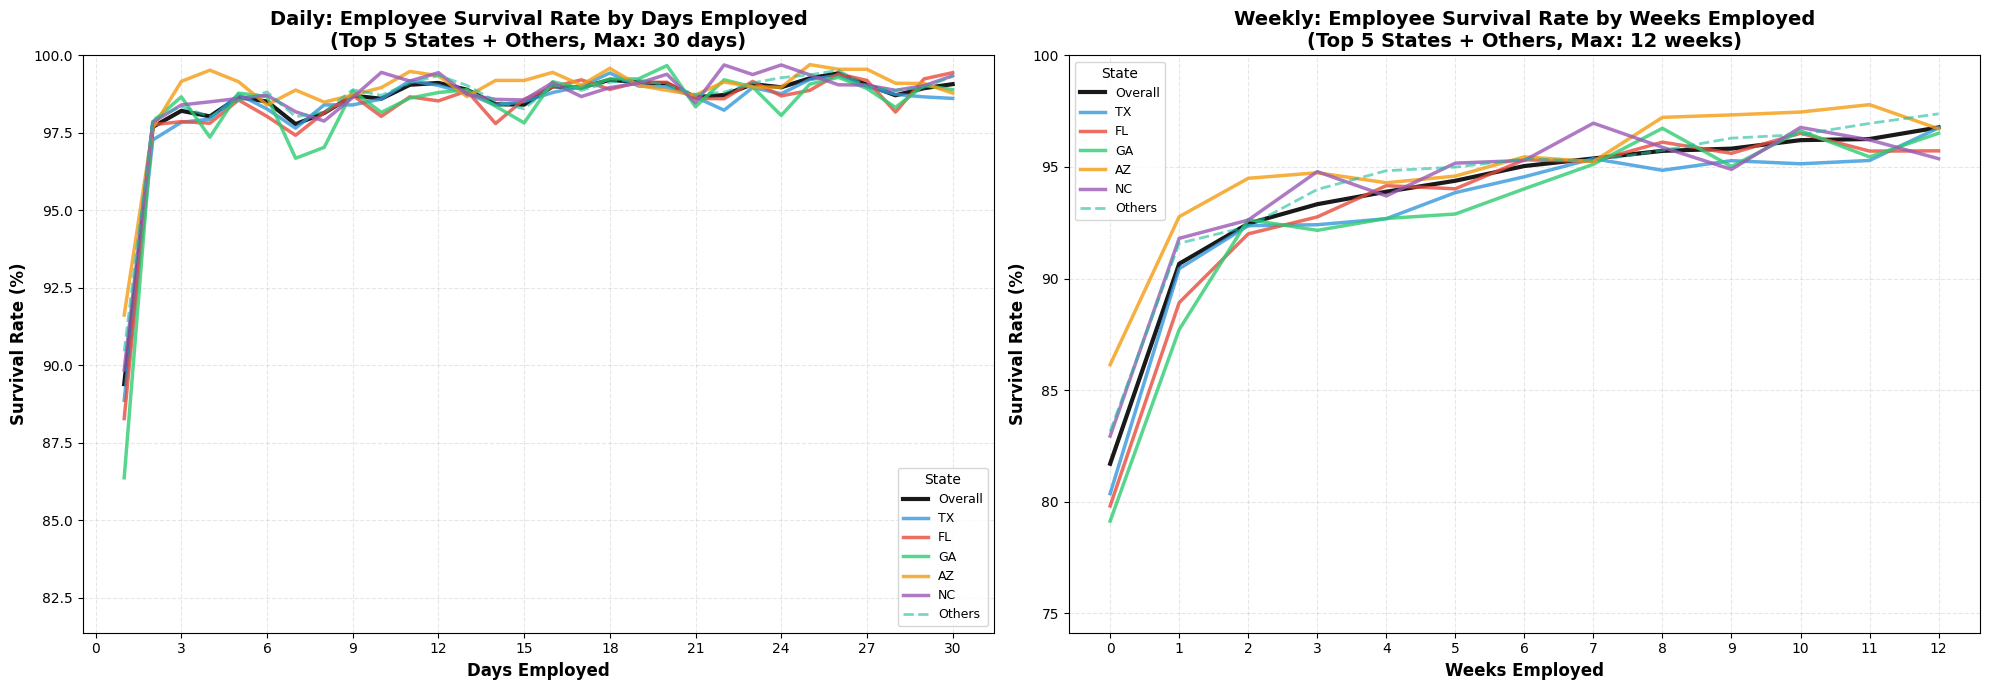

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ============================================
# PARAMETERS
# ============================================
num_top_states = 5      # Adjust this to match the number used in data preparation
max_days_to_plot = 30   # Adjust this value for daily plot
max_weeks_to_plot = 12  # Adjust this value for weekly plot

# ============================================
# DAILY PLOT PREPARATION
# ============================================

# Filter daily_survival_df based on days limit
plot_data_daily = daily_survival_df[daily_survival_df['days_employed'] <= max_days_to_plot].copy()

# Get the state column names (those starting with 'survival_pct_state_')
state_columns_daily = [col for col in daily_survival_df.columns if col.startswith('survival_pct_state_')]

# Extract state names from column names
state_names = [col.replace('survival_pct_state_', '') for col in state_columns_daily]

# Order states: put 'Others' last
state_order = [s for s in state_names if s != 'Others'] + (['Others'] if 'Others' in state_names else [])

print(f"\nState Groups (ordered): {state_order}")
print(f"Plotting days 1 to {max_days_to_plot}")

# Find the min and max survival rates for daily to set appropriate y-axis limits
min_survival_daily = plot_data_daily[['survival_pct_given_reached_day'] + state_columns_daily].min().min()
max_survival_daily = plot_data_daily[['survival_pct_given_reached_day'] + state_columns_daily].max().max()

# Add some padding to y-axis
y_min_daily = max(0, min_survival_daily - 5)
y_max_daily = min(100, max_survival_daily + 5)

# ============================================
# WEEKLY PLOT PREPARATION
# ============================================

# Filter weekly_survival_df based on weeks limit
plot_data_weekly = weekly_survival_df[weekly_survival_df['weeks_employed'] <= max_weeks_to_plot].copy()

# Get the state column names for weekly
state_columns_weekly = [col for col in weekly_survival_df.columns if col.startswith('survival_pct_state_')]

print(f"Plotting weeks 0 to {max_weeks_to_plot}")

# Find the min and max survival rates for weekly
min_survival_weekly = plot_data_weekly[['survival_pct_given_reached_week'] + state_columns_weekly].min().min()
max_survival_weekly = plot_data_weekly[['survival_pct_given_reached_week'] + state_columns_weekly].max().max()

# Add some padding to y-axis
y_min_weekly = max(0, min_survival_weekly - 5)
y_max_weekly = min(100, max_survival_weekly + 5)

# ============================================
# CREATE SIDE-BY-SIDE PLOTS
# ============================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Define colors (generate enough colors for the number of states + Others)
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6',
          '#1abc9c', '#e67e22', '#34495e', '#95a5a6', '#c0392b',
          '#7f8c8d', '#16a085', '#d35400', '#2c3e50', '#8e44ad']

# -------- LEFT PLOT: DAILY --------

# Plot overall survival rate first (thicker black line)
ax1.plot(plot_data_daily['days_employed'],
         plot_data_daily['survival_pct_given_reached_day'],
         label='Overall',
         color='black',
         linewidth=3,
         alpha=0.9)

# Plot each state
for idx, state in enumerate(state_order):
    col_name = f'survival_pct_state_{state}'

    ax1.plot(plot_data_daily['days_employed'],
             plot_data_daily[col_name],
             label=state,
             color=colors[idx % len(colors)],
             linewidth=2.5 if state != 'Others' else 2.0,
             alpha=0.8 if state != 'Others' else 0.6,
             linestyle='-' if state != 'Others' else '--')

# Customize daily plot
ax1.set_xlabel('Days Employed', fontsize=12, fontweight='bold')
ax1.set_ylabel('Survival Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title(f'Daily: Employee Survival Rate by Days Employed\n(Top {num_top_states} States + Others, Max: {max_days_to_plot} days)',
              fontsize=14, fontweight='bold')
ax1.legend(title='State', fontsize=9, loc='best')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim(y_min_daily, y_max_daily)
ax1.set_xticks(np.arange(0, max_days_to_plot + 1, max(1, max_days_to_plot // 10)))

# -------- RIGHT PLOT: WEEKLY --------

# Plot overall survival rate first (thicker black line)
ax2.plot(plot_data_weekly['weeks_employed'],
         plot_data_weekly['survival_pct_given_reached_week'],
         label='Overall',
         color='black',
         linewidth=3,
         alpha=0.9)

# Plot each state
for idx, state in enumerate(state_order):
    col_name = f'survival_pct_state_{state}'

    ax2.plot(plot_data_weekly['weeks_employed'],
             plot_data_weekly[col_name],
             label=state,
             color=colors[idx % len(colors)],
             linewidth=2.5 if state != 'Others' else 2.0,
             alpha=0.8 if state != 'Others' else 0.6,
             linestyle='-' if state != 'Others' else '--')

# Customize weekly plot
ax2.set_xlabel('Weeks Employed', fontsize=12, fontweight='bold')
ax2.set_ylabel('Survival Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title(f'Weekly: Employee Survival Rate by Weeks Employed\n(Top {num_top_states} States + Others, Max: {max_weeks_to_plot} weeks)',
              fontsize=14, fontweight='bold')
ax2.legend(title='State', fontsize=9, loc='best')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim(y_min_weekly, y_max_weekly)
ax2.set_xticks(np.arange(0, max_weeks_to_plot + 1, max(1, max_weeks_to_plot // 10)))

plt.tight_layout()
plt.show()